# **Import data and split for training and testing**

import image data of hand-write number from scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
from sklearn.model_selection import train_test_split

digits_data = datasets.load_digits()
digit_images = digits_data.data
labels = digits_data.target

x_train, x_test, t_train, t_test = train_test_split(digit_images, labels) #25% for test

# convert to tensor
x_train = torch.tensor(x_train,dtype = torch.float32)
t_train = torch.tensor(t_train,dtype = torch.int64)
x_test = torch.tensor(x_train,dtype = torch.float32)
t_test = torch.tensor(t_train,dtype = torch.int64)


<ipython-input-4-737c634afa22>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_train,dtype = torch.float32)
<ipython-input-4-737c634afa22>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_test = torch.tensor(t_train,dtype = torch.int64)


# Construct the model

Construct the model by using sequential class of nn module

In [11]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),  # 全結合層
    nn.ReLU(),          # ReLU
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


# Learning

Learning the model.
Setup the cross entropy error to the loss function, SGD to optimize Algoroth.
Perform forward propagation to both train data and test data to calculate the loss. Perform back propagation to only train data

In [13]:
from torch import optim

#cross entropy error
loss_fnc = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(), lr = 0.01) # lerning rate is 0.01

# log of the loss
record_loss_train = []
record_loss_test = []

#1000epocLearing
for i in range(1000):

  #set the gradient to 0
  optimizer.zero_grad()

  #forward propagation
  y_train = net(x_train)
  y_test = net(x_test)

  #calculate the loss
  loss_train = loss_fnc(y_train,t_train)
  loss_test = loss_fnc(y_test,t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  #back propagation
  loss_train.backward()

  #update the parameter
  optimizer.step()

  if i%100 ==0:
    print("Epoch:",i,"Loss_Train:",loss_train.item(),"Loss_Test:",loss_test.item())



Epoch: 0 Loss_Train: 2.4659199714660645 Loss_Test: 2.4659199714660645
Epoch: 100 Loss_Train: 0.8305469155311584 Loss_Test: 0.8305469155311584
Epoch: 200 Loss_Train: 0.3072000741958618 Loss_Test: 0.3072000741958618
Epoch: 300 Loss_Train: 0.19185179471969604 Loss_Test: 0.19185179471969604
Epoch: 400 Loss_Train: 0.1428406536579132 Loss_Test: 0.1428406536579132
Epoch: 500 Loss_Train: 0.11455249041318893 Loss_Test: 0.11455249041318893
Epoch: 600 Loss_Train: 0.09570649266242981 Loss_Test: 0.09570649266242981
Epoch: 700 Loss_Train: 0.08224854618310928 Loss_Test: 0.08224854618310928
Epoch: 800 Loss_Train: 0.07189474254846573 Loss_Test: 0.07189474254846573
Epoch: 900 Loss_Train: 0.06358563154935837 Loss_Test: 0.06358563154935837


# Error trends

plot the error trends

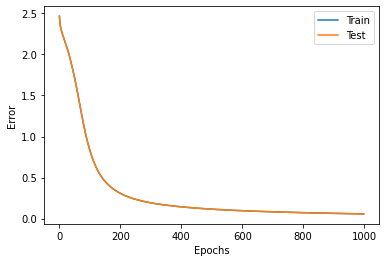

In [14]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)),record_loss_test, label = "Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# correct rate

For understanding the performance of the model, using test data to measure the correct rate

In [15]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("Correct rate :", str(count/len(y_test)*100) + "%")

Correct rate : 98.88641425389754%


# Prediction using learned model

import the image to check whether the model is working or not

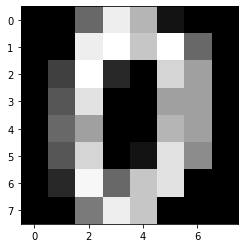

Correct : 0 Prediction: 0


In [16]:
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8,8)
plt.imshow(image,cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("Correct :" , labels[img_id],"Prediction:",y_pred.argmax().item())